In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
#Audio file - Saranyaa
audio_file1="/content/saranyaa.wav"

In [ ]:
y1,sr = librosa.load('/content/saranyaa.wav')
d=y1[10000:95000]
ipd.Audio(data=d,rate=sr)

In [ ]:
#Extract mfccs
mfccs= librosa.feature.mfcc(y=y1,sr=sr,n_mfcc=20)
print(mfccs.shape)

(20, 1280)


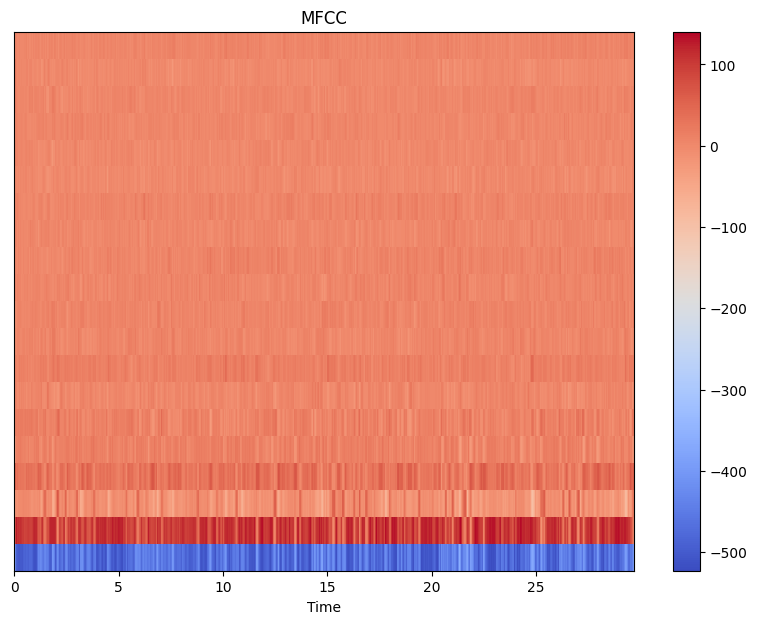

In [ ]:
#Visualize mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.show()

In [ ]:
#Calculate delta and delta2 MFCCs
delta_mfccs=librosa.feature.delta(mfccs)
delta2_mfccs=librosa.feature.delta(mfccs,order=2)

In [ ]:
delta_mfccs.shape

(20, 1280)

In [ ]:
mfccs.shape

(20, 1280)

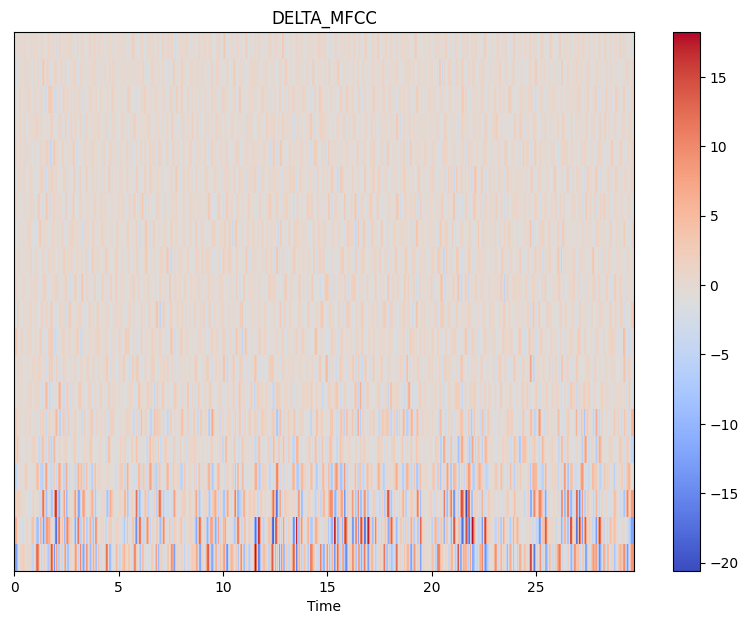

In [ ]:
#Visualize delta_mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(delta_mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('DELTA_MFCC')
plt.show()

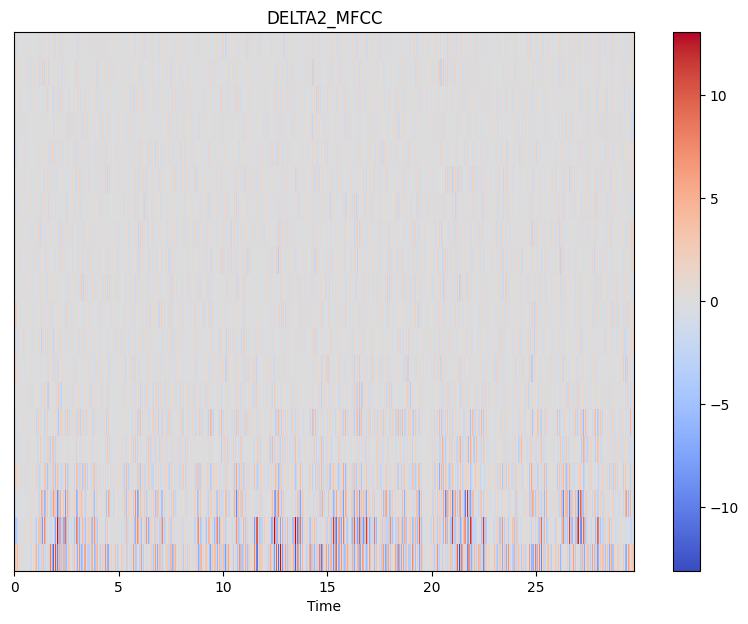

In [ ]:
#Visualize delta2_mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(delta2_mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('DELTA2_MFCC')
plt.show()

In [ ]:
comprehensive_mfccs=np.concatenate((mfccs,delta_mfccs,delta2_mfccs))
comprehensive_mfccs.shape

(60, 1280)

In [ ]:
y1, sr = librosa.load('/content/saranyaa.wav')
y1, _= librosa.effects.trim(y1)
mfc = librosa.feature.mfcc(y=y1, sr=sr, n_mfcc=20, n_fft=512, hop_length=256)
df = pd.DataFrame(mfc.T)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
X = z.fit_transform(df_filtered)

X = pd.DataFrame(X)
print(X.shape)


(2560, 20)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-544.284546,76.701950,-14.270660,58.742039,16.502748,-0.554065,6.103256,26.123234,-4.011932,15.866062,4.253925,-0.201016,9.088060,6.699370,3.540704,-12.916409,3.421697,7.231091,1.209719,-4.315432
1,-555.211670,52.458496,-34.046844,73.173546,4.181161,2.284721,5.715085,15.351227,-18.974102,33.507286,1.600632,13.957953,10.232698,2.991202,8.186567,8.912422,19.657146,15.634095,23.086300,11.321371
2,-591.094604,57.711037,-16.928226,63.286545,19.104733,3.430865,3.360217,17.449474,-22.109455,10.104544,7.549231,10.484074,10.856152,-0.898252,2.615579,-0.713525,0.947234,6.926950,8.800234,-7.989312
3,-578.217102,65.077766,-24.387234,51.425735,-21.689533,11.459406,7.655929,7.230762,2.320378,-5.289572,8.267884,3.429271,2.254870,6.813231,4.106323,9.706995,-2.567585,4.032842,11.044576,-4.246812
4,-571.252991,79.937813,-25.233530,47.579441,-24.652477,12.864140,4.232782,0.866169,-1.647695,-11.055273,0.738141,-6.522291,5.322793,5.466553,-7.919866,2.478729,-7.201445,5.336093,8.944698,-0.701391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,-542.041504,15.904699,32.341438,42.376434,-17.428215,30.687840,-11.389704,12.201270,1.710617,7.436993,-9.000295,5.936593,-0.712825,3.070133,6.616540,9.429394,12.999226,2.301060,-6.631725,4.474940
2556,-539.447083,-15.797100,14.809810,47.857372,-23.663193,21.766460,-1.179068,17.333092,-1.473124,12.274002,4.813654,25.125189,3.170105,-1.234919,5.306608,9.135802,8.619532,17.685556,-0.749400,8.266687
2557,-538.209534,1.339446,16.002153,63.405983,-23.205299,12.794308,-6.438704,12.660557,-2.319168,18.063019,-0.481383,4.179747,7.830343,8.914257,10.437147,8.507778,-2.193949,8.138428,3.106639,-2.862391
2558,-530.146301,11.178193,15.125469,65.858139,-18.342911,11.179270,10.397316,16.280434,-11.873104,16.312613,10.128815,9.980545,5.954519,-4.348549,3.408169,9.094655,-11.366339,-6.839568,5.461973,4.348401


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.059942,-0.458514,-0.160281,1.570327,0.466133,-0.741455,0.365943,1.377115,-0.942184,1.088391,-0.065765,-0.749031,0.886720,0.158255,0.594454,-1.761700,0.040169,0.509560,0.287717,-1.241868
1,1.743710,-1.226865,-0.956294,2.393756,-0.524688,-0.530929,0.327049,0.266604,-2.589750,3.175134,-0.369614,0.858252,1.029092,-0.274421,1.148658,0.992842,2.168259,1.601210,3.122255,0.905859
2,0.705252,-1.060396,-0.267251,1.829626,0.675367,-0.445931,0.091097,0.482917,-2.935000,0.406873,0.311605,0.463908,1.106638,-0.728248,0.484096,-0.221840,-0.284175,0.470048,1.271216,-1.746478
3,1.077929,-0.826921,-0.567484,1.152876,-2.605040,0.149468,0.521516,-0.570553,-0.244900,-1.414065,0.393903,-0.336932,0.036798,0.171540,0.661926,1.093107,-0.744886,0.094069,1.562015,-1.232443
4,1.279471,-0.355959,-0.601548,0.933415,-2.843300,0.253644,0.178526,-1.226694,-0.681846,-2.096078,-0.468384,-1.466603,0.418391,0.014407,-0.772676,0.180985,-1.352277,0.263377,1.289934,-0.745477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,2.124856,-2.385370,1.715907,0.636543,-2.262372,1.575455,-1.386805,-0.058132,-0.312044,0.091334,-1.583605,-0.052309,-0.332328,-0.265211,0.961370,1.058077,1.295560,-0.130910,-0.728295,-0.034504
2556,2.199939,-3.390100,1.010240,0.949273,-2.763748,0.913843,-0.363727,0.470919,-0.662623,0.663494,-0.001666,2.125922,0.150636,-0.767531,0.805108,1.021029,0.721484,1.867720,0.033875,0.486296
2557,2.235754,-2.846989,1.058233,1.836441,-2.726928,0.248465,-0.890728,-0.010783,-0.755785,1.348264,-0.608041,-0.251740,0.730283,0.416691,1.417129,0.941780,-0.695911,0.627434,0.533500,-1.042292
2558,2.469105,-2.535168,1.022945,1.976356,-2.335926,0.128693,0.796196,0.362398,-1.807820,1.141212,0.607012,0.406748,0.496966,-1.130835,0.578644,1.015837,-1.898198,-1.318387,0.838679,-0.051884


In [ ]:
from sklearn.mixture import GaussianMixture

n_components = 7
gmm_speaker1 = GaussianMixture(n_components=n_components)
gmm_speaker1.fit(X)

GaussianMixture(n_components=7)

In [ ]:
import joblib
joblib.dump(gmm_speaker1, 'saranyaa.pkl')

['saranyaa.pkl']

In [ ]:
#Audio-divya
y2,sr = librosa.load('/content/divya.wav')
d=y2[10000:95000]
ipd.Audio(data=d,rate=sr)

In [ ]:
#Extract mfccs
mfccs= librosa.feature.mfcc(y=y2,sr=sr,n_mfcc=20)
print(mfccs.shape)


(20, 1280)


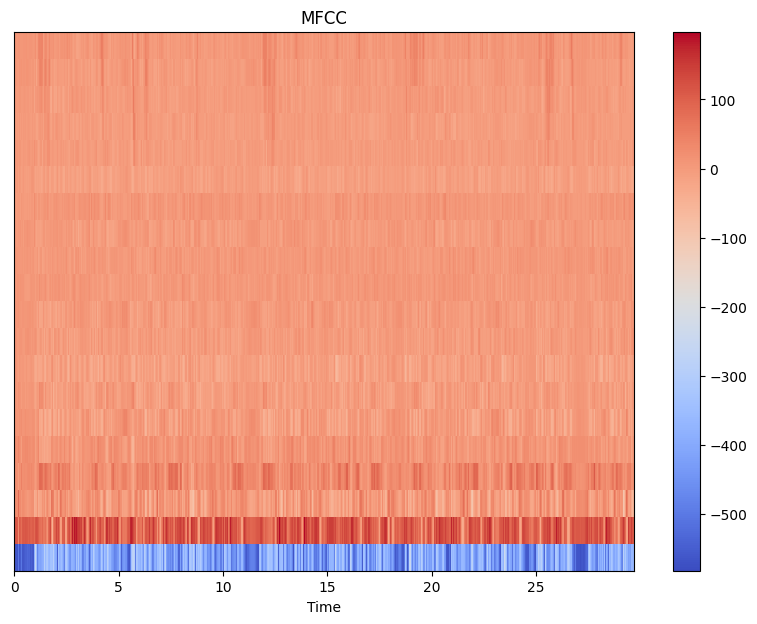

In [ ]:
#Visualize mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.show()

In [ ]:
#Calculate delta and delta2 MFCCs
delta_mfccs=librosa.feature.delta(mfccs)
delta2_mfccs=librosa.feature.delta(mfccs,order=2)


In [ ]:
delta_mfccs.shape

(20, 1280)

In [ ]:
mfccs.shape

(20, 1280)

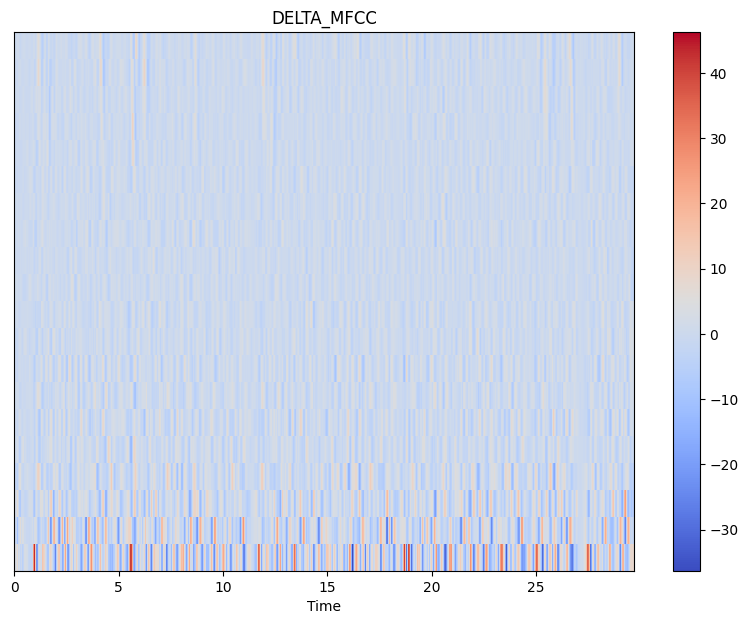

In [ ]:
#Visualize delta_mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(delta_mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('DELTA_MFCC')
plt.show()

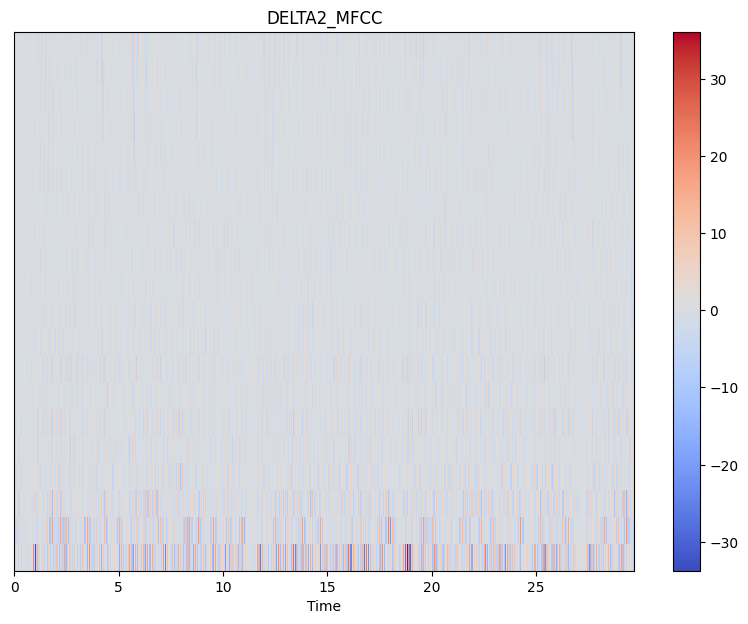

In [ ]:
#Visualize delta2_mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(delta2_mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('DELTA2_MFCC')
plt.show()


In [ ]:
comprehensive_mfccs=np.concatenate((mfccs,delta_mfccs,delta2_mfccs))
comprehensive_mfccs.shape


(60, 1280)

In [ ]:
y2, sr = librosa.load('/content/divya.wav')
y2, _= librosa.effects.trim(y2)
mfc = librosa.feature.mfcc(y=y2, sr=sr, n_mfcc=20, n_fft=512, hop_length=256)
df = pd.DataFrame(mfc.T)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
Y = z.fit_transform(df_filtered)

Y = pd.DataFrame(Y)
print(Y.shape)


(2560, 20)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-698.745972,85.545952,21.706238,43.539169,16.419867,10.714465,3.326173,3.931852,13.674535,10.558456,7.336653,2.420529,1.938609,0.019564,8.640512,14.819022,8.707647,1.837460,2.885758,8.200387
1,-711.442566,104.247040,24.654768,24.619293,30.563223,8.974630,-0.995130,6.483406,16.686478,20.510666,14.653574,5.851348,1.117902,2.231792,6.319514,8.034033,8.894753,11.582430,12.133939,7.504197
2,-708.771057,106.299675,26.242706,25.001659,32.397270,21.831985,13.406906,9.743832,10.278002,6.247222,3.062828,2.813745,-2.270549,-0.269593,6.616093,7.583631,9.593357,7.702312,3.107997,8.323297
3,-696.399780,108.720184,20.429789,24.989574,26.774704,11.766234,1.914232,4.166593,14.567301,8.593308,1.251922,5.102248,2.121402,-1.397775,6.583685,9.413858,1.411337,-3.450967,2.693599,13.322214
4,-715.200073,105.755547,33.480885,33.717896,35.883064,6.704813,-1.330977,12.652552,13.156579,6.049602,8.472126,11.967377,10.100929,9.528193,7.007010,-1.014091,-2.920684,5.866549,11.744187,5.743347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,-485.631378,124.610649,-58.898552,10.798756,0.683245,-13.912800,-6.526861,-14.347818,5.513508,-1.891957,-23.472229,-11.299580,-17.033150,11.125431,-32.621521,-3.885831,-7.942439,-5.239535,-14.064886,-12.591315
2556,-489.592041,119.050865,-56.301140,13.575085,3.230990,-12.375437,-4.136953,-18.630325,12.323956,-2.536573,-15.944450,-14.051036,-16.522392,9.059035,-34.186485,4.678012,-4.786158,-1.875123,-14.880622,-12.110294
2557,-485.638977,123.070450,-34.563656,20.845455,-0.074890,-17.445272,-7.661817,-14.092827,20.588430,-0.383962,-8.800315,-12.378239,-12.533966,12.791021,-41.222691,-0.058845,3.200175,2.135773,-9.857575,-10.020817
2558,-492.981049,114.055412,-14.849022,18.725058,6.917730,-7.949739,-12.652795,-8.433105,16.429087,5.850418,-1.904714,-21.245911,-16.767853,4.736044,-30.826263,3.815266,7.852789,-9.426469,-13.649427,-6.748615


In [ ]:
Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.488297,-0.448175,0.451649,0.324425,0.266294,0.638620,0.380542,0.813371,1.228209,0.823514,0.459860,-0.012922,0.361045,-0.383910,1.626813,1.688281,0.952004,0.153861,0.002358,0.077058
1,-1.642159,-0.058110,0.551814,-0.422562,1.091704,0.561033,0.076110,0.958102,1.479287,1.512444,1.168224,0.331502,0.297636,-0.162850,1.428931,1.012936,0.968071,0.959282,0.601781,0.028725
2,-1.609785,-0.015297,0.605759,-0.407466,1.198740,1.134399,1.090721,1.143042,0.945072,0.525074,0.046103,0.026553,0.035838,-0.412804,1.454217,0.968105,1.028063,0.638591,0.016762,0.085590
3,-1.459865,0.035190,0.408286,-0.407943,0.870605,0.685523,0.281072,0.826686,1.302631,0.687479,-0.129214,0.256299,0.375168,-0.525539,1.451454,1.150277,0.325441,-0.283227,-0.010097,0.432634
4,-1.687694,-0.026646,0.851649,-0.063335,1.402172,0.459812,0.052450,1.308032,1.185032,0.511394,0.569787,0.945499,0.991681,0.566253,1.487545,0.112330,-0.046567,0.486865,0.576519,-0.093519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,1.094315,0.366631,-2.286600,-0.968219,-0.652100,-0.459617,-0.313596,-0.223499,0.547900,-0.038351,-2.522805,-1.390303,-1.104747,0.725859,-1.891063,-0.173509,-0.477804,-0.431052,-1.096303,-1.366381
2556,1.046318,0.250666,-2.198363,-0.858605,-0.503413,-0.391059,-0.145229,-0.466414,1.115624,-0.082974,-1.794027,-1.666526,-1.065285,0.519372,-2.024487,0.678894,-0.206762,-0.152984,-1.149175,-1.332987
2557,1.094222,0.334505,-1.459912,-0.571559,-0.696345,-0.617145,-0.393553,-0.209035,1.804557,0.066038,-1.102390,-1.498592,-0.757132,0.892295,-2.624372,0.207410,0.479055,0.178517,-0.823605,-1.187927
2558,1.005248,0.146471,-0.790180,-0.655276,-0.288254,-0.193698,-0.745163,0.111999,1.457831,0.497606,-0.434814,-2.388829,-1.084249,0.087391,-1.738004,0.593021,0.878594,-0.777102,-1.069374,-0.960759


In [ ]:
from sklearn.mixture import GaussianMixture

n_components = 7
gmm_speaker2 = GaussianMixture(n_components=n_components)
gmm_speaker2.fit(Y)

GaussianMixture(n_components=7)

In [ ]:
import joblib
joblib.dump(gmm_speaker2, 'divya.pkl')

['divya.pkl']

In [ ]:
from sklearn.metrics import confusion_matrix
true_labels=[1 for i in range(len(X))];
t=[0 for i in range(len(Y))];
true_labels.extend(t);
predictions = []

for row in X.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))

  if score_speaker1 > score_speaker2:
    predictions.append(1)
  else:
    predictions.append(0)

for row in Y.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))

  if score_speaker1 > score_speaker2:
    predictions.append(1)
  else:
    predictions.append(0)

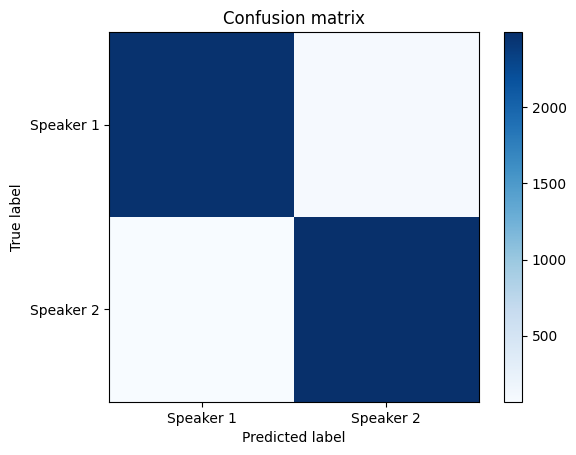

In [ ]:
cm = confusion_matrix(true_labels, predictions)
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1], ['Speaker 1', 'Speaker 2'])
plt.yticks([0, 1], ['Speaker 1', 'Speaker 2'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
!pip install pydub

In [ ]:
import torch
import numpy as np
from pydub import AudioSegment
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript
import IPython.display as ipd
import librosa
from scipy.io.wavfile import write
from pydub import AudioSegment
from pydub.silence import split_on_silence



RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=2, filename='recorded_sound.wav'):
    print()
    print("Speak Now...")
    print()
    display(Javascript(RECORD))
    sec += 1
    s = output.eval_js('record(%d)' % (sec*1000))
    #print("Done Recording !")
    b = b64decode(s.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(b)
    webm_audio = AudioSegment.from_file("recorded_sound.wav", format="webm")
    webm_audio.export("recorded_sound.wav", format="wav")
    y,sr = librosa.load('recorded_sound.wav')

    return None





In [ ]:
record()

In [ ]:
ipd.Audio('/content/recorded_sound.wav')

In [ ]:
y3,sr = librosa.load('/content/recorded_sound.wav')
d=y3[10000:95000]
ipd.Audio(data=d,rate=sr)

In [ ]:
#Extract mfccs
mfccs= librosa.feature.mfcc(y=y3,sr=sr,n_mfcc=20)
print(mfccs.shape)

(20, 145)


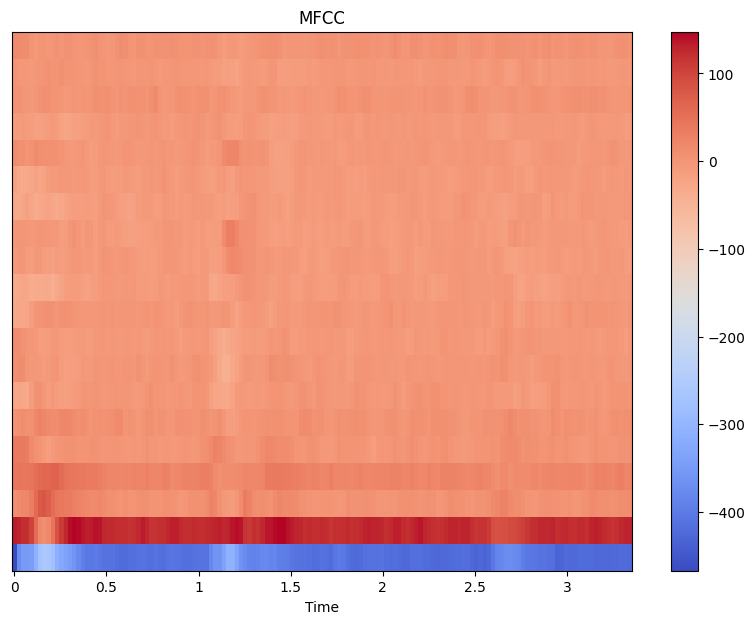

In [ ]:
#Visualize mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.show()

In [ ]:
#Calculate delta and delta2 MFCCs
delta_mfccs=librosa.feature.delta(mfccs)
delta2_mfccs=librosa.feature.delta(mfccs,order=2)

In [ ]:
delta_mfccs.shape

(20, 145)

In [ ]:
mfccs.shape

(20, 145)

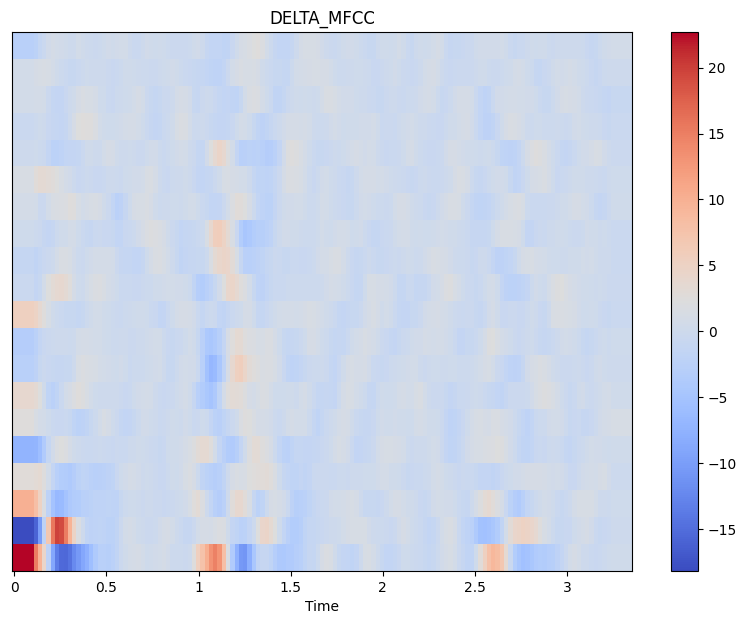

In [ ]:
#Visualize delta_mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(delta_mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('DELTA_MFCC')
plt.show()

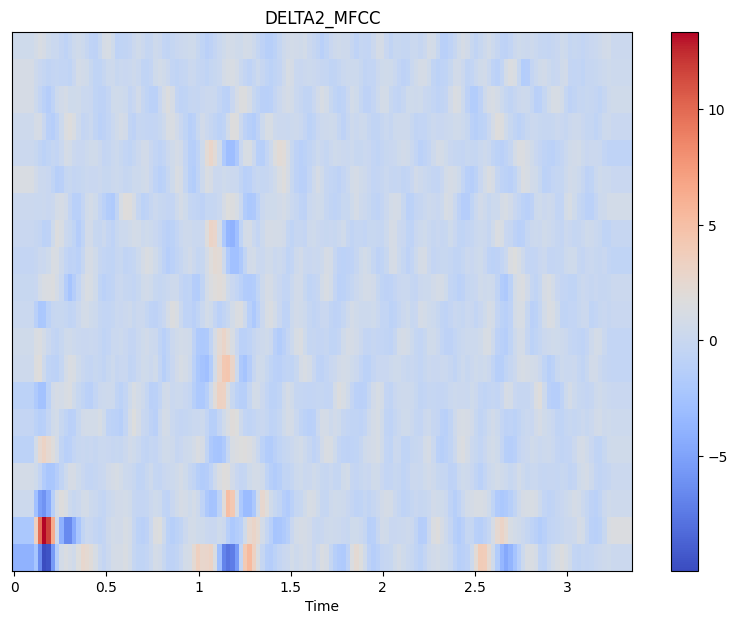

In [ ]:
#Visualize delta2_mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(delta2_mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('DELTA2_MFCC')
plt.show()


In [ ]:
comprehensive_mfccs=np.concatenate((mfccs,delta_mfccs,delta2_mfccs))
comprehensive_mfccs.shape

(60, 145)

In [ ]:
y3, sr = librosa.load('/content/recorded_sound.wav')
y3, _= librosa.effects.trim(y3)
mfc = librosa.feature.mfcc(y=y3, sr=sr, n_mfcc=20, n_fft=512, hop_length=256)
df = pd.DataFrame(mfc.T)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
Z = z.fit_transform(df_filtered)

Z = pd.DataFrame(Z)
print(Z.shape)

(289, 20)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-963.101257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-717.185608,97.199860,-16.254585,21.166224,-1.433225,-10.876923,-15.236939,-8.489580,-13.400724,-21.517487,-3.811507,3.873246,7.272418,-0.053730,1.495734,14.984871,-5.163351,15.281296,6.292528,6.340343
2,-571.883240,119.775055,9.069860,32.993233,5.737211,2.146246,-5.693662,1.571039,-1.287995,2.898791,-5.040484,-11.061328,-14.944828,-15.060743,-2.296405,10.370752,10.750360,12.638479,-9.200005,1.116208
3,-547.364075,133.098022,5.667142,34.813335,12.308647,16.827223,5.794336,-0.533770,-1.195627,-6.873408,-4.415184,-5.707549,-9.914822,-13.480886,-14.962116,-5.622943,-9.207352,-9.389940,0.011490,13.102053
4,-561.101624,118.138084,9.797297,23.275311,3.137764,12.994617,4.507292,-1.321714,3.314820,-5.393675,-10.744028,-1.078288,-12.604120,-10.680740,-1.415211,-9.243116,-15.756435,0.526815,-2.093026,13.853041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,-586.078003,112.914658,7.374481,23.679947,4.585380,12.630640,6.153785,5.420907,-1.386113,4.359222,-0.013639,6.079386,-0.345365,-2.701578,2.680660,5.557504,-9.459441,-3.494352,-9.840130,-9.259893
301,-575.917480,116.709549,5.526465,24.021498,-2.123346,0.909158,-4.894275,-0.130640,-0.543401,-7.409318,-5.920552,3.332945,-11.013033,-5.540969,-9.969374,-7.666046,-11.380133,-2.563068,-17.004429,-9.789282
302,-585.377869,105.959824,4.781418,29.462568,-4.525466,3.348739,14.343693,14.175791,-9.848675,-15.503996,-0.480998,3.333035,-11.505409,-4.181774,-3.101222,14.645343,-2.508133,-7.779282,-15.482802,-4.723565
303,-584.022095,111.743423,1.591094,18.044756,-12.001383,3.601370,1.298642,2.707278,-9.680617,-4.602189,-4.223975,-3.860965,-12.263742,-6.823626,3.733043,2.356970,2.117544,-11.560028,-8.468947,13.630543


In [ ]:
Z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.988067,1.547058,-1.471892,0.615467,3.252920,-0.907526,-2.041576,0.681325,1.790482,-3.144650,-1.550138,0.343393,0.975952,-0.796751,-0.092217,2.149205,-0.699906,-0.557423,-0.100398,0.479306
1,0.919859,0.048727,-0.069502,1.986988,3.063798,-0.982254,-2.647421,1.654724,2.134174,-3.534793,-3.106857,-0.289048,0.260032,-2.487539,-2.442835,1.580267,0.185757,1.021243,1.346493,3.320044
2,1.446097,0.485497,0.613312,1.995655,3.784771,1.061541,-1.756780,1.799387,1.962416,-2.240358,-1.779783,0.664911,0.808263,-3.326177,-3.265508,0.995714,-0.131312,0.438626,-0.999166,1.281273
3,1.509268,0.221214,0.106972,0.632050,3.029755,0.817105,-2.676987,1.452556,1.077979,-3.067004,-1.290792,0.357240,0.115434,-1.465061,-3.693775,1.401516,0.184553,0.143020,0.885562,1.650742
4,1.382884,-0.348423,0.717841,1.565022,4.475323,1.809863,-2.709562,0.836125,0.816667,-2.720721,-1.141530,0.048072,0.052292,-1.630612,-3.490954,0.811466,0.581651,-0.302859,-0.505016,1.239165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.469936,0.528025,0.208462,0.655208,1.300556,0.550853,1.010190,0.258083,-0.356958,1.544821,0.878326,-0.043657,-0.967332,0.240787,-0.243463,-1.022335,0.350400,-0.375178,0.065252,1.022853
285,-0.792217,0.408850,0.020138,-0.313784,0.222741,1.292787,1.264099,-0.453849,-1.967584,-1.639749,-0.425956,-0.661516,-0.653694,0.937633,1.356190,0.585872,-0.097723,-1.057797,-1.025042,-0.940686
286,-0.202827,0.826227,-0.234410,-1.113227,-0.312699,-0.101964,0.320609,-0.366434,-0.822329,-0.786432,-0.005746,-0.167317,-0.525590,0.343087,0.441883,-0.056274,-0.700066,-0.680069,-0.043984,-0.361900
287,-0.854334,-0.096544,0.209777,0.327024,-0.438414,-0.401688,-0.146917,1.227959,1.780632,1.062021,0.939456,-0.921602,0.229782,1.291317,0.328356,0.039330,-0.284423,-0.633679,-1.301575,-0.023269


In [ ]:
n_components = 7
rec= GaussianMixture(n_components=n_components)
rec.fit(Z)

GaussianMixture(n_components=7)

In [ ]:
s1=0
s2=0

for row in Z.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))

  if score_speaker1 > score_speaker2:
    s1+=1
  else:
    s2+=1

In [ ]:
s1,s2

(131, 30)

In [ ]:
y4,sr = librosa.load('/content/ananth.wav')
d=y4[10000:95000]
ipd.Audio(data=d,rate=sr)

In [ ]:
#Extract mfccs
mfccs= librosa.feature.mfcc(y=y4,sr=sr,n_mfcc=20)
print(mfccs.shape)

(20, 706)


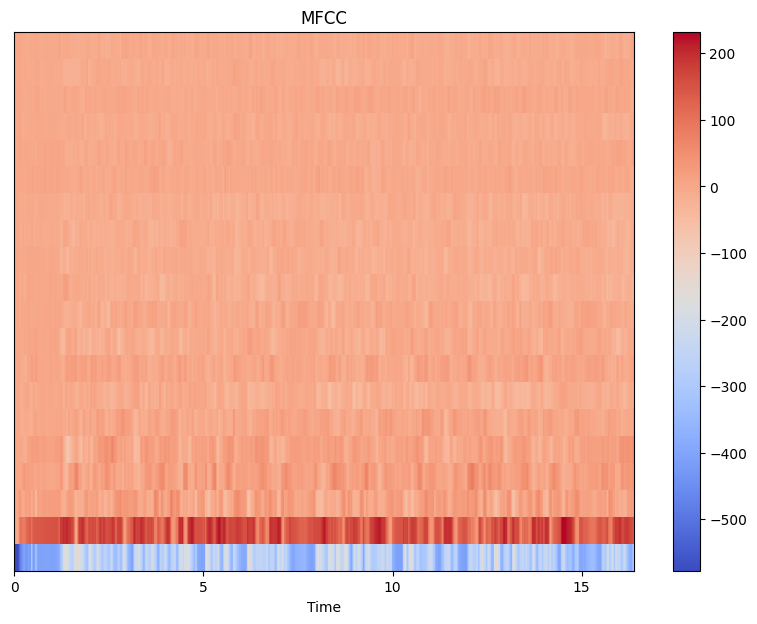

In [ ]:
#Visualize mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.show()

In [ ]:
#Calculate delta and delta2 MFCCs
delta_mfccs=librosa.feature.delta(mfccs)
delta2_mfccs=librosa.feature.delta(mfccs,order=2)

In [ ]:
delta_mfccs.shape

(20, 706)

In [ ]:
mfccs.shape

(20, 706)

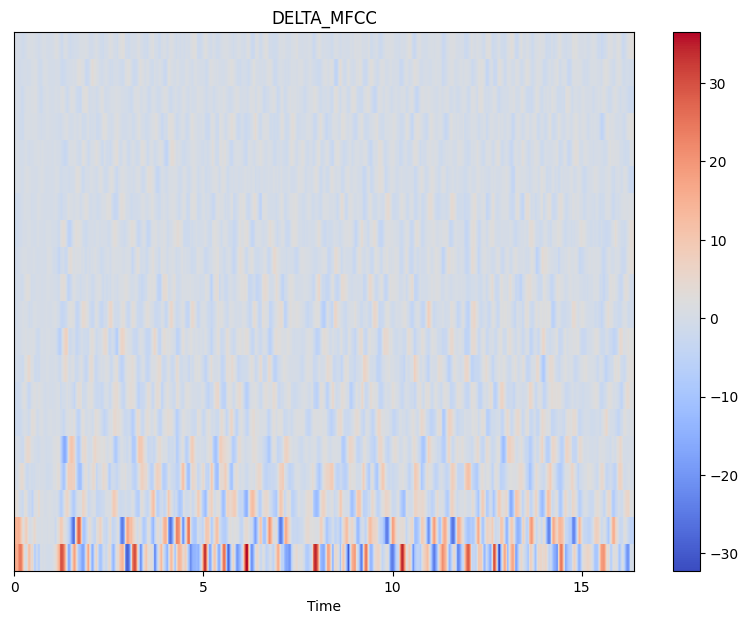

In [ ]:
#Visualize delta_mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(delta_mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('DELTA_MFCC')
plt.show()

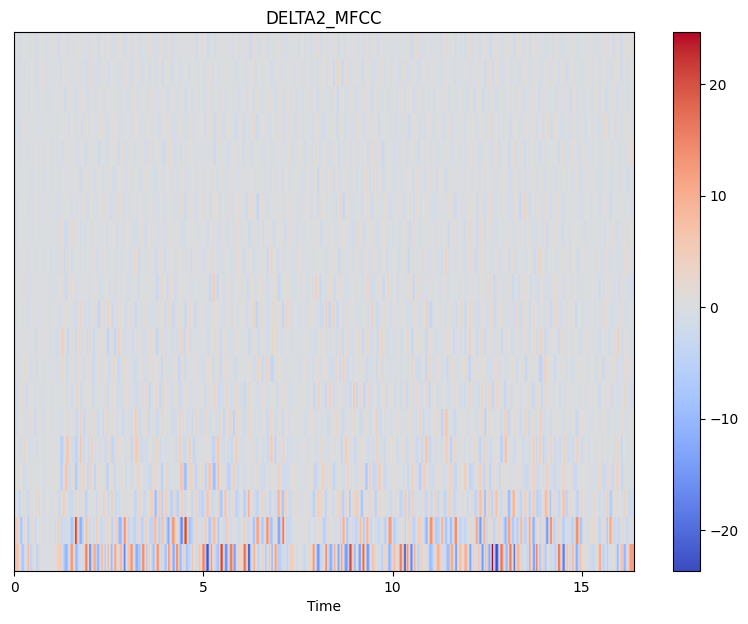

In [ ]:
#Visualize delta2_mfcc
plt.figure(figsize=(10,7))
librosa.display.specshow(delta2_mfccs,x_axis='time',sr=sr)
plt.colorbar()
plt.title('DELTA2_MFCC')
plt.show()


In [ ]:
comprehensive_mfccs=np.concatenate((mfccs,delta_mfccs,delta2_mfccs))
comprehensive_mfccs.shape

(60, 706)

In [ ]:
y4, sr = librosa.load('/content/ananth.wav')
y4, _= librosa.effects.trim(y4)
mfc = librosa.feature.mfcc(y=y4, sr=sr, n_mfcc=20, n_fft=512, hop_length=256)
df = pd.DataFrame(mfc.T)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
A = z.fit_transform(df_filtered)

A = pd.DataFrame(A)
print(A.shape)

(1402, 20)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-716.011719,1.531080,1.528141,1.523254,1.516425,1.507672,1.497010,1.484469,1.470069,1.453847,1.435835,1.416075,1.394607,1.371479,1.346740,1.320444,1.292646,1.263408,1.232789,1.200856
1,-714.595825,2.774338,1.037968,-0.437676,-0.617789,0.591908,2.297897,3.283236,2.884623,1.441531,0.008978,-0.427629,0.354272,1.707453,2.636116,2.528028,1.554213,0.473249,0.032068,0.435081
2,-657.887207,62.915020,22.412148,-3.631410,-8.892426,-4.903146,1.392945,5.089299,2.577901,0.016969,3.289222,5.004605,-0.835431,-5.116665,-0.325698,6.480065,8.360920,7.540387,5.338102,1.441750
3,-640.448730,80.512932,28.638533,0.199461,-2.095158,-1.252507,-3.042234,-1.627735,-0.638129,-5.338685,-10.862262,-11.961192,-11.078955,-9.734978,-5.385939,0.550585,4.007751,4.924080,3.710700,-0.348471
4,-619.964050,94.729004,26.443443,2.632545,-0.098381,-13.557702,-17.778206,-8.462922,-9.415381,-16.070621,-10.802670,-3.272686,-4.935515,-7.375249,-6.172165,-7.126715,-9.704610,-8.832518,-3.479331,3.766089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,-519.672791,172.895844,46.646832,40.812950,30.227510,-8.905104,-0.508379,10.578936,-3.638835,-14.520677,-16.869591,-12.588142,-8.851288,-7.417041,-6.799520,-1.290735,-2.058092,-3.451934,-3.180945,-2.098700
1398,-504.925507,153.435913,24.692432,39.442352,44.757431,-2.417275,0.187249,6.511788,-2.873929,-1.262552,-21.364107,-13.750864,-14.455054,-17.109688,-14.735847,8.624924,-9.626848,-19.547760,-21.181252,-4.057614
1399,-476.867126,146.129700,21.867462,46.833206,48.659809,-9.047993,-14.228827,8.295782,-12.533116,-4.042760,-32.185093,-24.347221,-12.589418,-5.772450,-16.879475,12.731020,-13.455736,-20.480043,-9.465204,2.499819
1400,-448.912628,139.247467,11.428746,47.063721,61.828312,8.129086,-15.068181,24.265224,-10.898164,-19.375309,-41.708084,-19.089434,-6.451598,-19.123524,-19.786724,11.750940,-7.893990,-9.941838,0.894247,5.586742


In [ ]:
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.575225,-3.072686,-0.667172,-0.883747,-0.489599,-0.200887,0.755624,-0.345413,0.417464,0.337274,0.960851,0.977745,0.974519,1.124659,0.062521,0.404012,0.816905,0.060098,0.781282,0.729882
1,-3.556909,-3.046971,-0.687235,-0.971608,-0.587560,-0.262459,0.810293,-0.208944,0.515708,0.336351,0.845537,0.797917,0.875178,1.159109,0.220691,0.538899,0.845918,-0.040951,0.640315,0.630953
2,-2.823336,-1.803051,0.187617,-1.114706,-0.967368,-0.631922,0.748520,-0.071921,0.494405,0.229634,1.110636,1.327758,0.761574,0.459376,-0.142640,0.980341,1.600906,0.862829,1.263253,0.761003
3,-2.597754,-1.439065,0.442466,-0.943060,-0.655372,-0.386469,0.445770,-0.581530,0.271045,-0.171568,-0.033041,-0.327026,-0.216573,-0.014177,-0.763390,0.318019,1.118060,0.528243,1.072193,0.529728
4,-2.332768,-1.145027,0.352620,-0.834044,-0.563719,-1.213817,-0.560126,-1.100103,-0.338555,-0.975518,-0.028225,0.520420,0.370060,0.227786,-0.859838,-0.539534,-0.402893,-1.231018,0.228071,1.061279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,-1.035416,0.471737,1.179552,0.876661,0.828246,-0.900997,0.618734,0.344567,0.062639,-0.859409,-0.518534,-0.388177,-0.003855,0.223500,-0.936797,0.112344,0.445247,-0.542923,0.263102,0.303620
1398,-0.844648,0.069237,0.280950,0.815250,1.495172,-0.464783,0.666218,0.036000,0.115763,0.133783,-0.881766,-0.501584,-0.538954,-0.770365,-1.910362,1.219922,-0.394267,-2.601336,-1.850166,0.050552
1399,-0.481689,-0.081881,0.165323,1.146404,1.674292,-0.910604,-0.317841,0.171349,-0.555089,-0.074488,-1.756282,-1.535116,-0.360806,0.392133,-2.173325,1.678572,-0.818961,-2.720561,-0.474681,0.897692
1400,-0.120074,-0.224229,-0.261937,1.156732,2.278729,0.244308,-0.375136,1.382921,-0.441537,-1.223079,-2.525899,-1.022290,0.225290,-0.976860,-2.529963,1.569098,-0.202062,-1.372884,0.741536,1.296485


In [ ]:
n_components =7
gmm_speaker3= GaussianMixture(n_components=n_components)
gmm_speaker3.fit(A)

GaussianMixture(n_components=7)

In [ ]:
import joblib
joblib.dump(gmm_speaker3, 'ananth.pkl')

['ananth.pkl']

In [ ]:
s1=0
s3=0

for row in Z.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))

  if score_speaker1 > score_speaker3:
    s1+=1
  else:
    s3+=1

In [ ]:
s1,s3

(186, 103)

In [ ]:
s1=0
s2=0
s3=0

for row in Z.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))
  score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))

  if (score_speaker1 > score_speaker3)&(score_speaker1 > score_speaker2):
    s1+=1
  elif (score_speaker2 > score_speaker3)&(score_speaker2 > score_speaker1):
    s2+=1
  else:
    s3+=1

In [ ]:
s1,s2,s3

(170, 26, 93)

In [ ]:
BIC1 = []
BIC2 = []
BIC3 = []

n = len(X)
for i in range(3,20):
  gmm1 = GaussianMixture(n_components = i)
  gmm1.fit(X[0:50].values)
  sum_log_likelihoods = gmm1.score(X.values)
  bic = 3*np.log(n) - 2*sum_log_likelihoods
  BIC1.append(bic)

n = len(Y)
for i in range(3,20):
  gmm1 = GaussianMixture(n_components = i)
  gmm1.fit(Y[0:50].values)
  sum_log_likelihoods = gmm1.score(Y.values)
  bic = 3*np.log(n) - 2*sum_log_likelihoods
  BIC2.append(bic)

n = len(A)
for i in range(3,20):
  gmm1 = GaussianMixture(n_components = i)
  gmm1.fit(A[0:50].values)
  sum_log_likelihoods = gmm1.score(A.values)
  bic = 3*np.log(n) - 2*sum_log_likelihoods
  BIC3.append(bic)

print('optimal number of mixture components for speaker 1 GMM: ',3+BIC1.index(min(BIC1)))
print('optimal number of mixture components for speaker 2 GMM: ',3+BIC2.index(min(BIC2)))
print('optimal number of mixture components for speaker 3 GMM: ',3+BIC3.index(min(BIC3)))



import numpy as np
from sklearn.mixture import GaussianMixture

n_components = 3+BIC1.index(min(BIC1)) # Number of components for the GMM
gmm_speaker1 = GaussianMixture(n_components=n_components)
gmm_speaker1.fit(X.values)

n_components = 3+BIC2.index(min(BIC2))
gmm_speaker2 = GaussianMixture(n_components=n_components)
gmm_speaker2.fit(Y.values)

n_components = 3+BIC3.index(min(BIC3))
gmm_speaker3 = GaussianMixture(n_components=n_components)
gmm_speaker3.fit(A.values)



optimal number of mixture components for speaker 1 GMM:  3
optimal number of mixture components for speaker 2 GMM:  3
optimal number of mixture components for speaker 3 GMM:  3


GaussianMixture(n_components=3)

**Afresh**

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [2]:
y,sr = librosa.load('saranyaa.wav')
y, _ = librosa.effects.trim(y)
df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = pd.DataFrame(mfc.T)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
X = z.fit_transform(df_filtered)

X = pd.DataFrame(X)

X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.342860,0.366416,-0.237315,1.037280,0.779719,-0.746657,0.449016,1.266411,-0.667749,0.812614,-0.061284,-0.757332,0.913498,0.429380,0.458092,-1.679823,-0.252070,0.826294,0.205006,-1.008791
1,0.239795,-0.859350,-0.710188,1.486647,0.163477,-0.819987,0.756450,-0.172528,-1.553475,2.110684,0.328375,0.153734,1.521831,-0.363530,1.236494,1.126747,1.873830,1.836837,3.209666,1.067870
2,-0.344418,-0.611750,-0.187553,1.078089,0.983510,-0.595027,0.403720,0.270556,-1.964881,-0.236941,0.497598,0.214090,1.183733,-0.421000,0.347853,-0.082255,-0.681663,0.808204,1.157455,-1.268451
3,-0.090293,-0.518797,-0.284644,0.319017,-1.577413,-0.098827,0.652079,-0.485637,-0.280284,-1.236156,0.149407,-0.084300,-0.040356,0.456386,0.494604,1.140235,-0.831253,0.403809,1.604144,-1.151463
4,0.050538,-0.061120,-0.190035,0.075016,-1.683499,-0.125455,0.324071,-0.984116,-0.738535,-1.664482,-0.874242,-1.108836,0.183245,0.317647,-0.782424,0.089443,-1.249592,0.238657,1.533996,-0.760634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86128,1.481259,2.564982,-0.827020,0.062426,0.430935,-1.134833,-0.869642,0.060615,1.505941,-0.562088,-2.879532,-1.348012,0.416544,-0.762632,-1.849173,0.128195,0.552956,-1.021521,-0.217709,-0.211013
86129,2.292296,2.750076,-0.844915,0.842753,-0.413070,-2.368998,-1.690710,-2.374177,-0.240556,-0.463287,-1.704476,0.971275,-0.319577,-1.100782,-1.525961,1.611349,-1.078661,-2.119183,-1.297160,-1.071870
86130,2.718152,1.511841,-1.366443,1.262971,-0.802989,-3.309963,-1.486912,-2.412925,-0.200321,-0.797678,-1.588338,1.655641,-1.184464,-0.631520,-2.067682,1.451765,-0.544648,-1.591248,0.036612,-1.873433
86131,2.389487,0.938394,-1.053552,2.110474,-0.319282,-3.070023,-0.757755,-3.292632,-1.025430,-0.972379,0.250566,2.349251,-0.518391,-0.448785,-1.326198,0.477480,-0.944543,-1.376469,0.006838,-1.528315


In [3]:
(len(y)/sr)/60

16.666666666666668

In [18]:
n_components =3
gmm_speaker1= GaussianMixture(n_components=n_components)
gmm_speaker1.fit(X)

GaussianMixture(n_components=3)

In [19]:
import joblib
joblib.dump(gmm_speaker1, 'saranyaa.pkl')

['saranyaa.pkl']

In [4]:
y,sr = librosa.load('divya.wav')
y, _ = librosa.effects.trim(y)
df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = pd.DataFrame(mfc.T)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
Y = z.fit_transform(df_filtered)

Y = pd.DataFrame(Y)

Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.218977,-0.326486,0.402059,0.031616,0.435498,0.444442,0.329734,0.661127,1.037866,0.907084,0.433154,0.157878,0.000305,-0.188472,1.418450,1.599868,0.825444,0.167823,0.177669,0.051782
1,-1.278015,-0.083865,0.532374,-0.540861,0.814903,0.608800,-0.095153,0.778066,1.409242,1.452561,1.307188,0.443441,0.066290,-0.017756,1.212445,0.935282,0.748265,1.068667,0.804887,0.025393
2,-1.257820,-0.038625,0.582654,-0.523499,0.999606,1.106970,0.832324,1.008002,0.823287,0.507109,0.204326,-0.052839,-0.191323,-0.287439,1.156914,1.064127,0.835832,0.622761,0.231713,0.082057
3,-1.132130,0.042320,0.398957,-0.576147,0.765855,0.650637,0.063836,0.739854,1.146312,0.655049,0.009738,0.278264,0.091787,-0.419030,1.294706,1.088158,0.133193,-0.200688,0.120190,0.413970
4,-1.298393,-0.072928,0.762287,-0.129581,1.069269,0.525665,0.019321,1.060652,1.062224,0.501097,0.660996,0.992984,0.849265,0.689294,1.284297,0.206924,-0.217841,0.523084,0.707523,-0.072328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86128,1.275641,-1.106547,-1.336510,0.781311,-1.640541,-0.814504,-0.114026,-0.183638,-0.701864,0.666941,0.280798,0.941452,-0.794060,1.640391,0.042053,1.274150,0.953532,-0.462905,0.181003,-0.168447
86129,0.021722,-1.307207,0.418602,2.421973,-1.063359,-0.308780,0.659070,0.743505,-0.507015,0.649768,1.083007,1.799249,0.080055,1.863861,0.216399,0.723070,0.227254,-0.068292,1.040441,-1.028614
86130,0.934759,1.096300,-0.583568,2.018292,-1.675868,-1.508903,-0.621242,-1.010646,-0.315934,-1.156426,-0.111395,0.933478,-1.474954,0.642995,1.044013,-0.378315,1.212050,0.766872,0.722794,0.364539
86131,1.066192,0.334691,-1.590474,2.542614,-2.198689,-1.885344,-0.301519,-0.948096,0.032322,-1.072002,1.103788,1.716890,-1.021912,1.308899,0.707224,-1.196740,-0.673633,-0.704016,-0.472945,-0.822222


In [20]:
n_components =4
gmm_speaker2= GaussianMixture(n_components=n_components)
gmm_speaker2.fit(Y)

GaussianMixture(n_components=4)

In [21]:
import joblib
joblib.dump(gmm_speaker2, 'divya.pkl')

['divya.pkl']

In [5]:
y,sr = librosa.load('ananth.wav')
y, _ = librosa.effects.trim(y)
df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = pd.DataFrame(mfc.T)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
Z = z.fit_transform(df_filtered)

Z = pd.DataFrame(Z)

Z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.667836,-3.523212,-0.972549,-0.700193,-0.936352,-0.475498,0.810607,-0.151951,0.096857,0.681538,0.752854,0.806048,1.122598,0.927687,0.255206,0.197615,0.753322,0.170552,0.294425,0.418476
1,-3.667596,-3.522728,-0.971673,-0.699286,-0.935391,-0.474031,0.811918,-0.150353,0.098448,0.683054,0.754442,0.807926,1.124456,0.929536,0.257285,0.199507,0.755245,0.172643,0.296485,0.420503
2,-3.146270,-2.665855,-0.223438,-0.689712,-1.262017,-0.808138,0.836693,0.067957,0.289088,0.835129,0.954619,1.027045,1.156410,0.780337,0.202221,0.563798,1.523259,1.029326,0.800968,0.652332
3,-2.940721,-2.305909,0.232835,-0.369620,-1.029699,-0.671148,0.729695,-0.238743,-0.108820,0.269579,0.031050,-0.334205,-0.078056,-0.055476,-0.333193,0.261859,1.321581,0.916015,0.675484,0.333612
4,-2.674235,-1.924857,0.460399,-0.360397,-1.206610,-1.408577,-0.077354,-0.958992,-0.687757,-0.246026,-0.060975,0.252904,0.569148,0.204646,-0.377719,-0.275725,-0.129851,-1.030916,-0.136713,1.052854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77341,-1.613972,-0.635377,0.643419,-0.359288,-0.673927,-0.708162,0.870912,1.062442,1.038225,0.464367,0.270503,0.854290,1.487594,0.985666,-0.408354,-0.937579,-0.410200,-0.661476,0.017294,0.714361
77342,-1.646488,-0.628900,0.641155,-0.544990,-0.557545,-0.017118,0.902471,0.367274,0.685573,0.396545,-0.139871,-0.004410,0.503754,0.253396,-0.411960,-0.542976,-0.266371,-0.562421,0.280502,0.448786
77343,-1.777688,-0.839662,0.567533,-0.270713,-0.295457,-0.112861,0.812392,0.645366,0.794573,0.229854,0.153012,1.171886,1.954578,1.751678,1.357998,0.741880,0.202048,-0.704631,0.239941,0.556007
77344,-1.394170,-0.761088,-0.040049,-0.123112,-0.173626,-0.220959,0.611126,-0.082164,0.429944,0.721849,0.632212,1.188807,1.135997,-0.343098,-0.498944,0.616987,1.060391,0.118650,-0.191870,-0.364716


In [22]:
n_components =3
gmm_speaker3= GaussianMixture(n_components=n_components)
gmm_speaker3.fit(Z)

GaussianMixture(n_components=3)

In [23]:
joblib.dump(gmm_speaker3, 'ananth.pkl')

['ananth.pkl']

In [6]:
import numpy as np
from sklearn.mixture import GaussianMixture

BIC1 = []
BIC2 = []
BIC3 = []

n = len(X)
for i in range(3,20):
  gmm1 = GaussianMixture(n_components = i)
  gmm1.fit(X[0:50].values)
  sum_log_likelihoods = gmm1.score(X.values)
  bic = 3*np.log(n) - 2*sum_log_likelihoods
  BIC1.append(bic)

n = len(Y)
for i in range(3,20):
  gmm1 = GaussianMixture(n_components = i)
  gmm1.fit(Y[0:50].values)
  sum_log_likelihoods = gmm1.score(Y.values)
  bic = 3*np.log(n) - 2*sum_log_likelihoods
  BIC2.append(bic)

n = len(Z)
for i in range(3,20):
  gmm1 = GaussianMixture(n_components = i)
  gmm1.fit(Z[0:50].values)
  sum_log_likelihoods = gmm1.score(Z.values)
  bic = 3*np.log(n) - 2*sum_log_likelihoods
  BIC3.append(bic)

print('optimal number of mixture components for speaker 1 GMM: ',3+BIC1.index(min(BIC1)))
print('optimal number of mixture components for speaker 2 GMM: ',3+BIC2.index(min(BIC2)))
print('optimal number of mixture components for speaker 3 GMM: ',3+BIC3.index(min(BIC3)))



import numpy as np
from sklearn.mixture import GaussianMixture

n_components = 3+BIC1.index(min(BIC1)) # Number of components for the GMM
gmm_speaker1 = GaussianMixture(n_components=n_components)
gmm_speaker1.fit(X.values)

n_components = 3+BIC2.index(min(BIC2))
gmm_speaker2 = GaussianMixture(n_components=n_components)
gmm_speaker2.fit(Y.values)

n_components = 3+BIC3.index(min(BIC3))
gmm_speaker3 = GaussianMixture(n_components=n_components)
gmm_speaker3.fit(Z.values)

optimal number of mixture components for speaker 1 GMM:  3
optimal number of mixture components for speaker 2 GMM:  4
optimal number of mixture components for speaker 3 GMM:  3


GaussianMixture(n_components=3)

In [7]:
import joblib
joblib.dump(gmm_speaker1, 'saranyaa.pkl')
joblib.dump(gmm_speaker2, 'divya.pkl')
joblib.dump(gmm_speaker3, 'ananth.pkl')


['ananth.pkl']

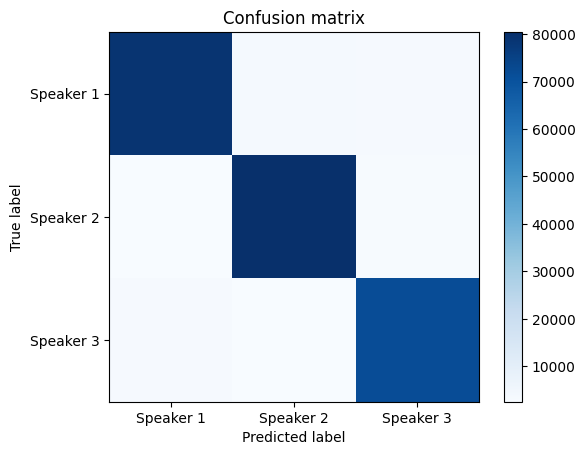

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
true_labels=[1 for i in range(len(X))];t=[0 for i in range(len(Y))];tt=[2 for i in range(len(Z))]
true_labels.extend(t);true_labels.extend(tt)
predictions = []


for row in X.values:

  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1,-1))
  score_speaker3 = gmm_speaker3.score(row.reshape(1,-1))
  if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:       # speaker 1
    predictions.append(1)
  elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:      # speaker 3
    predictions.append(2)
  else:
    predictions.append(0)   #speaker 2

for row in Y.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))
  score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))

  if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:
    predictions.append(1)
  elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:
    predictions.append(2)
  else:
    predictions.append(0)

for row in Z.values:
  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1, -1))
  score_speaker3 = gmm_speaker3.score(row.reshape(1, -1))
  if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:
    predictions.append(1)
  elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:
    predictions.append(2)
  else:
    predictions.append(0)

cm = confusion_matrix(true_labels, predictions)
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1, 2], ['Speaker 1', 'Speaker 2', 'Speaker 3'])
plt.yticks([0, 1, 2], ['Speaker 1', 'Speaker 2', 'Speaker 3'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# 4 mins

In [ ]:
total_correct = np.sum(np.diag(cm))
total = np.sum(cm)
accuracy = total_correct / total
print("Accuracy:", accuracy)

Accuracy: 0.9305001362114


In [ ]:
record()


Speak Now...



<IPython.core.display.Javascript object>

In [ ]:
y,sr = librosa.load('/content/recorded_sound.wav')
y, _ = librosa.effects.trim(y)
df = pd.DataFrame()
mfc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=20,n_fft=512,hop_length=256)
df = pd.DataFrame(mfc.T)

df_filtered = df[(df != 0).all(1)]

z = StandardScaler()
W = z.fit_transform(df_filtered)

W = pd.DataFrame(Z)


for row in W.values:

  score_speaker1 = gmm_speaker1.score(row.reshape(1, -1))
  score_speaker2 = gmm_speaker2.score(row.reshape(1,-1))
  score_speaker3 = gmm_speaker3.score(row.reshape(1,-1))
  if score_speaker1 > score_speaker2 and score_speaker1 > score_speaker3:       # speaker 1
    predictions.append(1)
  elif score_speaker3 > score_speaker2 and score_speaker3 > score_speaker1:      # speaker 3
    predictions.append(2)
  else:
    predictions.append(0)   #speaker 2

In [ ]:
predictions.count(1),predictions.count(2),predictions.count(0)

(88141, 149884, 88933)